#Importing Dependencies & Dataset:

In [1]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  error: subprocess-exited-with-error
  
  × Running setup.py install for tensorflow-gpu did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for tensorflow-gpu ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> tensorflow-gpu

note: This i

In [2]:
# Limiting the GPU utilization so that we prevent out of memory errors
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [4]:
# We will only take the training data from the dataset
ds = tfds.load('celeb_a', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/162770 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/celeb_a/2.0.1.incompleteBD63J1/celeb_a-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/19867 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/celeb_a/2.0.1.incompleteBD63J1/celeb_a-validation.tfrecord*...:   0%|     …

Generating test examples...:   0%|          | 0/19962 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/celeb_a/2.0.1.incompleteBD63J1/celeb_a-test.tfrecord*...:   0%|          |…

Dataset celeb_a downloaded and prepared to /root/tensorflow_datasets/celeb_a/2.0.1. Subsequent calls will reuse this data.


In [5]:
ds.as_numpy_iterator().next().keys()

dict_keys(['attributes', 'image', 'landmarks'])

#Visualizing & Building The Dataset:

In [6]:
import numpy as np

### We want to iterate over the data without putting it all in memory. Therefore, we will create a data iterator. 

In [7]:
data_iterator = ds.as_numpy_iterator()

In [8]:
# We iteratre over the data in samples using "next()"
data_iterator.next()

{'attributes': {'5_o_Clock_Shadow': False,
  'Arched_Eyebrows': False,
  'Attractive': True,
  'Bags_Under_Eyes': False,
  'Bald': False,
  'Bangs': False,
  'Big_Lips': True,
  'Big_Nose': False,
  'Black_Hair': False,
  'Blond_Hair': False,
  'Blurry': False,
  'Brown_Hair': False,
  'Bushy_Eyebrows': False,
  'Chubby': False,
  'Double_Chin': False,
  'Eyeglasses': False,
  'Goatee': False,
  'Gray_Hair': False,
  'Heavy_Makeup': True,
  'High_Cheekbones': True,
  'Male': False,
  'Mouth_Slightly_Open': True,
  'Mustache': False,
  'Narrow_Eyes': False,
  'No_Beard': True,
  'Oval_Face': False,
  'Pale_Skin': False,
  'Pointy_Nose': True,
  'Receding_Hairline': False,
  'Rosy_Cheeks': False,
  'Sideburns': False,
  'Smiling': True,
  'Straight_Hair': False,
  'Wavy_Hair': True,
  'Wearing_Earrings': False,
  'Wearing_Hat': False,
  'Wearing_Lipstick': True,
  'Wearing_Necklace': False,
  'Wearing_Necktie': False,
  'Young': True},
 'image': array([[[ 30,  32,  21],
         [ 30,  3

In [9]:
print(data_iterator.next()['image'].shape)

(218, 178, 3)


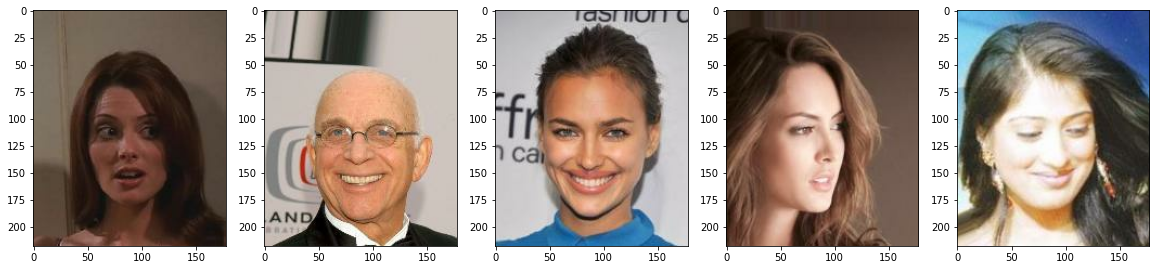

In [21]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for i in range(5): 
    sample = data_iterator.next()
    img = sample['image']
    ax[i].imshow(img)

###Our images' values are between 0 & 255. We want to scale them to 0 & 1. We are also resizing the image from 218X178 to 178X178.

In [43]:
def scale_images(data): 
    image = data['image']
    image = tf.image.resize(image, [178,178]) 
    image = tf.cast(image,"uint8")
    return image / 255

### We are going to pass our dataset through a pipeline:
- <b>map</b>: Apply a function to all the images.
- <b>cache</b>: The first time the dataset is iterated over, its elements will be cached either in the specified file or in memory. Subsequent iterations will use the cached data.
- <b>shuffle</b>: This dataset fills a buffer with buffer_size elements, then randomly samples elements from this buffer, replacing the selected elements with new elements. For perfect shuffling, a buffer size greater than or equal to the full size of the dataset is required.
- <b>batch</b>
- <b>prefetch</b>: Most dataset input pipelines should end with a call to prefetch. This allows later elements to be prepared while the current element is being processed. This often improves latency and throughput, at the cost of using additional memory to store prefetched elements.

In [44]:
# Reload the dataset 
ds = tfds.load('celeb_a', split='train')
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images) 
# Cache the dataset for that batch 
ds = ds.cache()
# Shuffle it up 
ds = ds.shuffle(162,770)
# Batch into 128 images per sample
ds = ds.batch(128)
# Reduces the likelihood of bottlenecking 
ds = ds.prefetch(64)

In [45]:
ds.as_numpy_iterator().next().shape

(128, 178, 178, 3)

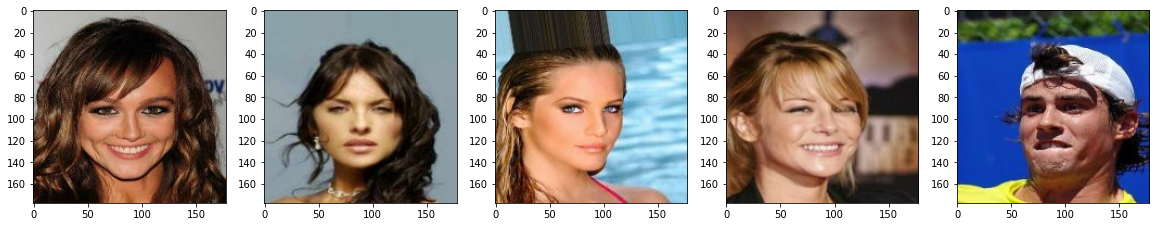

In [46]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for i in range(5): 
    images = ds.as_numpy_iterator().next()
    ax[i].imshow(images[i])

#Building The Generator:

In [47]:
# These will be used for both the generator and the discriminator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

###We want the output image to be 178 X 178 X 3 like our dataset
###We can calculate the output of the Conv2D function as follows:
[(W−K+2P)/S]+1.

- W is the input volume - in your case 128
- K is the Kernel size - in your case 5
- P is the padding - in your case 0 i believe
- S is the stride - which you have not provided.

In [110]:
def build_generator(): 
    model = Sequential()
    
    # We are going to generate based on 128 random values
    # Takes in random values and reshapes it to 14x11x128. We are giving the 128 random values (array) some spatial area to output an image
    # Beginnings of a generated image
    model.add(Dense(6*6*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((6,6,128)))
    
    # Upsampling block 1 
    model.add(UpSampling2D()) # This gets us to 14X11X128
    model.add(Conv2D(filters = 128, kernel_size = 5, strides = 1, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Upsampling block 2 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # Upsampling block 3 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # Upsampling block 4
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # Upsampling block 5
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    

    # Sampling block
    model.add(UpSampling2D())
    model.add(Conv2D(128, kernel_size = 29, strides = 2, padding='valid'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Conv layer to get to one channel
    model.add(Conv2D(3, 4, padding='same', activation='sigmoid'))
    
    return model

In [111]:
generator = build_generator()

In [112]:
generator.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4608)              594432    
                                                                 
 leaky_re_lu_134 (LeakyReLU)  (None, 4608)             0         
                                                                 
 reshape_20 (Reshape)        (None, 6, 6, 128)         0         
                                                                 
 up_sampling2d_112 (UpSampli  (None, 12, 12, 128)      0         
 ng2D)                                                           
                                                                 
 conv2d_115 (Conv2D)         (None, 12, 12, 128)       409728    
                                                                 
 leaky_re_lu_135 (LeakyReLU)  (None, 12, 12, 128)      0         
                                                     

In [128]:
# Generator expects the 128 numbers to be enclosed in an array
img = generator.predict(np.random.randn(1,128))

1/1 [==============================] - 25s 25s/step


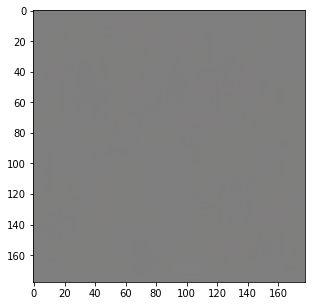

In [131]:
fig, ax = plt.subplots(ncols=1, figsize=(5,5))
ax.imshow(np.squeeze(img))   

From the image above. We can see that our generator can't generate any images of faces. Which is to be expected since it hasn't been trained.

#Building The Discriminator:

In [113]:
def build_discriminator(): 
    model = Sequential()
    
    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (178,178,3)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid')) # 1 will represent a fake image and 0 will represent a real one
    
    return model 

In [114]:
discriminator = build_discriminator()

In [115]:
discriminator.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_124 (Conv2D)         (None, 174, 174, 32)      2432      
                                                                 
 leaky_re_lu_143 (LeakyReLU)  (None, 174, 174, 32)     0         
                                                                 
 dropout (Dropout)           (None, 174, 174, 32)      0         
                                                                 
 conv2d_125 (Conv2D)         (None, 170, 170, 64)      51264     
                                                                 
 leaky_re_lu_144 (LeakyReLU)  (None, 170, 170, 64)     0         
                                                                 
 dropout_1 (Dropout)         (None, 170, 170, 64)      0         
                                                                 
 conv2d_126 (Conv2D)         (None, 166, 166, 128)   

In [133]:
img.shape

(1, 178, 178, 3)

In [132]:
# Discriminator expects the image to be enclosed in an array (We can predict multiple images at once)
discriminator.predict(img)

1/1 [==============================] - 1s 1s/step


array([[0.5088518]], dtype=float32)